In [1]:
import wget
import os
os.remove('COVID-19_casus_landelijk.csv')
wget.download('https://data.rivm.nl/covid-19/COVID-19_casus_landelijk.csv')   

'COVID-19_casus_landelijk (1).csv'

In [6]:
import pandas as pd
data = pd.read_csv('COVID-19_casus_landelijk.csv',sep=';',index_col='Date_statistics',parse_dates=True)
data['n']=1
data.tail()

,Date_file,Date_statistics_type,Agegroup,Sex,Province,Hospital_admission,Deceased,Week_of_death,Municipal_health_service,n
Date_statistics,,,,,,,,,,
2021-01-11,2021-01-11 10:00:00,DON,10-19,Female,Gelderland,Unknown,Unknown,NaN,Veiligheids- en Gezondheidsregio Gelderland-Mi...,1
2021-01-11,2021-01-11 10:00:00,DON,50-59,Male,Fryslân,Unknown,Unknown,NaN,GGD Fryslân,1
2021-01-11,2021-01-11 10:00:00,DPL,20-29,Male,Utrecht,Unknown,Unknown,NaN,GGD Regio Utrecht,1
2021-01-11,2021-01-11 10:00:00,DON,30-39,Female,Gelderland,Unknown,Unknown,NaN,GGD Noord- en Oost-Gelderland,1
2021-01-11,2021-01-11 10:00:00,DON,20-29,Male,Gelderland,Unknown,Unknown,NaN,GGD Gelderland-Zuid,1


Text(0.5, 0, 'datum')

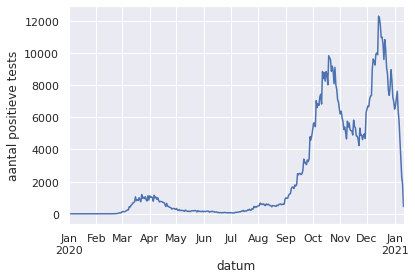

In [8]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
%matplotlib inline
count=data['n']
daily=count.resample('D').sum()
daily.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')

Text(0.5, 0, 'datum')

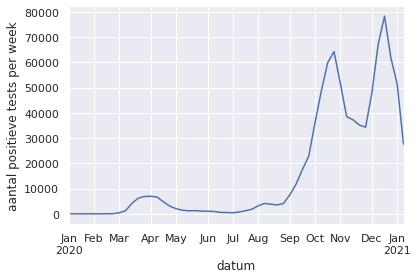

In [15]:
weekly=count.resample('W').sum()
weekly.plot()
plt.ylabel('aantal positieve tests per week')
plt.xlabel('datum')

Text(0.5, 0, 'datum')

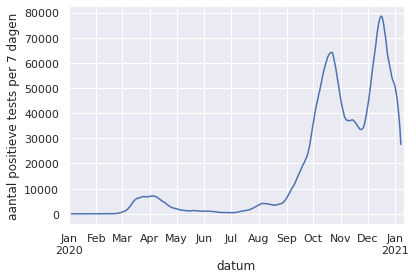

In [7]:
daily.rolling(7,center=True).sum().plot()
plt.ylabel('aantal positieve tests per 7 dagen')
plt.xlabel('datum')

Text(0.5, 1.0, 'Zuid-Holland')

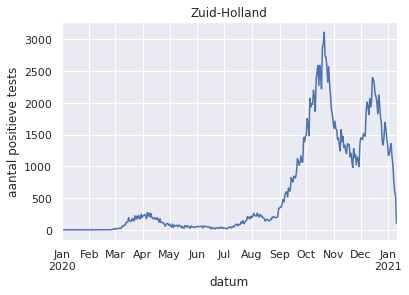

In [21]:
province='Zuid-Holland'
prov_data=data[data.Province == province]
prov_count=prov_data['n']
dailyprov=prov_count.resample('D').sum()
dailyprov.plot()
plt.ylabel('aantal positieve tests')
plt.xlabel('datum')
plt.title(province)

In [11]:
os.remove('COVID-19_reproductiegetal.json')
wget.download('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json')
rgdata=pd.read_json('COVID-19_reproductiegetal.json')
rgdata.set_index('Date',inplace=True)
rgdata.head()


,Rt_low,Rt_avg,Rt_up,population
Date,,,,
2020-02-17,0.50,1.93,4.00,hosp
2020-02-18,0.00,1.74,4.00,hosp
2020-02-19,0.50,1.59,2.83,hosp
2020-02-20,0.83,1.74,2.83,hosp
2020-02-21,0.67,2.03,3.67,hosp


Text(0, 0.5, 'reproductiegetal')

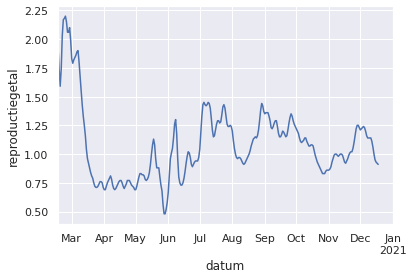

In [12]:
rg=rgdata['Rt_avg']
rg.plot()
plt.xlabel('datum')
plt.ylabel('reproductiegetal')

In [24]:
import os
os.remove('COVID-19_aantallen_gemeente_per_dag.csv')
wget.download('https://data.rivm.nl/covid-19/COVID-19_aantallen_gemeente_per_dag.csv')

'COVID-19_aantallen_gemeente_per_dag.csv'

In [20]:
gemdata=pd.read_csv('COVID-19_aantallen_gemeente_per_dag.csv',sep=';',index_col='Date_of_publication',parse_dates=True)
gemdata.head()

,Date_of_report,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
Date_of_publication,,,,,,,,,,,
2020-02-27,2021-01-11 10:00:00,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-11 10:00:00,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2020-02-27,2021-01-11 10:00:00,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-11 10:00:00,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
2020-02-27,2021-01-11 10:00:00,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


Text(0.5, 1.0, 'Vlaardingen')

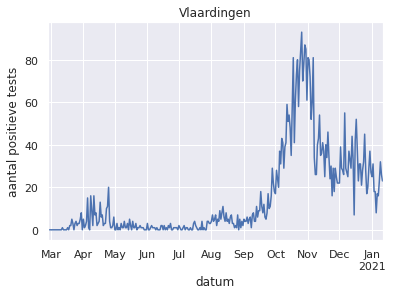

In [22]:
vld=gemdata[gemdata.Municipality_name=='Vlaardingen']
vld_count=vld['Total_reported']
vld_count.plot()
plt.xlabel('datum')
plt.ylabel('aantal positieve tests')
plt.title('Vlaardingen')